# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# importing all necessary libraries
import requests


In [4]:
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [5]:
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)
    

In [6]:
r.status_code

200

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
with open ('tweet-json.txt') as file:
    df_api = pd.read_json(file, lines=True, encoding='utf8')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing twitter archive table

In [8]:
# scrolling through the enhanced archive data
df_arch


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# random assessing
df_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1260,710269109699739648,NaN,NaN,2016-03-17 00:58:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The squad is back for St. Patrick's Day! ☘ 💚\n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710269109...,13,10,None,None,None,None,None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,None,None,None,None
1681,681981167097122816,NaN,NaN,2015-12-29 23:32:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He's a Trinidad Poliwhirl. Fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681981167...,12,10,Jimothy,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
1582,687109925361856513,NaN,NaN,2016-01-13 03:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He looks like a fun dog. Prefe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687109925...,11,10,Baxter,None,None,None,None
1041,743980027717509120,NaN,NaN,2016-06-18 01:33:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Geno. He's a Wrinkled Baklavian Velvee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743980027...,11,10,Geno,None,None,None,None
1335,705239209544720384,NaN,NaN,2016-03-03 03:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,None,None,None,None
957,751538714308972544,NaN,NaN,2016-07-08 22:09:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Max. She has one ear that's always sli...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751538714...,10,10,Max,None,None,None,None
1130,729113531270991872,NaN,NaN,2016-05-08 00:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge accepted""\n10/10 https://t.co/vNjvr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729113531...,10,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None


In [10]:
# checking more details of dataset and columns data types
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# check descriptive stats of rating denominator
df_arch['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [12]:
# check max value of rating denominator
df_arch['rating_denominator'].max()

170

In [13]:
# check min value of rating denominator
df_arch['rating_denominator'].min()

0

In [14]:
# check tweet id with value greater than 10
df_arch[df_arch['rating_denominator']>10].count()[0]

20

In [15]:
# check tweets  with denominator ratings less than 10
df_arch[df_arch['rating_denominator']<10].count()[0]

3

In [16]:
# check descriptive stats of rating numerator
df_arch['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [17]:
# check tweets  with numerator ratings less than 10
df_arch[df_arch['rating_numerator']<10].count()[0]

440

In [18]:
df_arch['name'].value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Toby                7
Buddy               7
Daisy               7
an                  7
Bailey              7
Oscar               6
Rusty               6
Leo                 6
Stanley             6
Scout               6
Jax                 6
Milo                6
Jack                6
Dave                6
Koda                6
Bella               6
Oakley              5
                 ... 
Bert                1
Freddery            1
Arlen               1
Edmund              1
Ivar                1
Pubert              1
Monty               1
Creg                1
Crouton             1
Iroh                1
Anthony             1
Tom                 1
Juckson             1
Kota                1
Gilbert   

### Assessing Image predictions table

In [19]:
# load data set
df_img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [20]:
# visually assess table
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
df_img_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
214,670046952931721218,https://pbs.twimg.com/media/CUx8JSEXIAU6zPp.jpg,1,Blenheim_spaniel,0.998335,True,beagle,0.000647,True,Brittany_spaniel,0.000392,True
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625,True,Labrador_retriever,0.068718,True,kuvasz,0.030387,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
364,672884426393653248,https://pbs.twimg.com/media/CVaQ0M4UsAAki3t.jpg,1,tusker,0.122410,False,warthog,0.119870,False,water_buffalo,0.105856,False
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
1408,770293558247038976,https://pbs.twimg.com/media/CrCh5RgW8AAXW4U.jpg,1,Italian_greyhound,0.931668,True,Mexican_hairless,0.038896,True,whippet,0.013151,True
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,Labrador_retriever,0.887707,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True


In [22]:
# more details of table
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Assessing API data

In [23]:
# having a glimpse at table
df_api.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [24]:
# sub set df_api to contain id , retweet count and favorite count
df_tweet = pd.DataFrame(df_api, columns=['id','retweet_count','favorite_count'])

In [25]:
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [26]:
df_tweet.sample(10)

,id,retweet_count,favorite_count
1771,678255464182861824,418,1726
502,813066809284972545,2276,8865
1864,675349384339542016,2532,4237
259,842892208864923648,56625,0
1265,709566166965075968,1367,3865
964,750383411068534784,1309,5005
1285,708356463048204288,1520,3929
1890,674754018082705410,488,1456
1594,686286779679375361,1887,4392
298,836989968035819520,2610,13879


In [27]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues

#### Twitter_archive_enhanced
1. There are 23 rating denominators that are higher/lower than 10

2. Some dog stages/class are missing

3. The tweet_id and timestamp has an invalid data type 

4. There are few missing values in retweet_count, favorite_count and some irrelevant columns with a lot missing data
 
5. Remove from table retweets and replies keeping only original tweets.

6. Column source in tw_arc is too long for such source information


#### Image_predictions
7. The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.

8. There are some missing images in prediction table

#### Api data
9. The column id str should be changed to tweet id.

### Tidiness issues
1. All data are connected but separated into three independent data frames.

2. Data on dog stages is categorized into four columns.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
clean_arch = df_arch.copy()
clean_img = df_img_pred.copy()
clean_tweet = df_tweet.copy()


### Cleaning Tidiness issues

### Issue #1:
All data are connected but separated into three independent data frames.

#### Define:
Merge all tables into a single data frame

#### Code

In [29]:
# rename id column in tweet table for consistency
clean_tweet.rename(columns = {'id': 'tweet_id'}, inplace=True)

In [30]:
clean_tweet.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [31]:
# merge archive data on api data
clean_data = pd.merge(clean_arch,clean_tweet, on='tweet_id', how='left')

# merge above data to image prediction
clean_data = pd.merge(clean_data,clean_img, on='tweet_id', how='left')

#### Test

In [32]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

### Issue #2:
Data on dog classes is categorized into four columns.

#### Define
Extract dog stage from text column into new column

#### Code

In [33]:
# Extract dog stage from text column into new column called dog_stage
clean_data['dog_class'] = clean_data['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN


#### Test

In [34]:
clean_data['dog_class'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_class, dtype: int64

In [35]:
clean_data['dog_class'].isnull().sum()

1957

In [36]:
clean_data.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,...,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True,NaN
1171,720415127506415616,NaN,NaN,2016-04-14 00:55:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Garden's coming in nice this year. 10/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720415127...,...,Rottweiler,0.990312,True,black-and-tan_coonhound,0.002495,True,American_black_bear,0.001733,False,NaN


### Cleaning Quality issues

### Issue #1
There are 23 rating denominators that are higher/lower than 10

#### Define
Drop entire column since all rating denominator is 10

#### Code

In [37]:
clean_data.drop(columns=['rating_denominator'], inplace=True)

#### Test

In [38]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2354 non-null float64
favorite_count                

### Issue #2
Some dog stages/class are missing

#### Define
Replace all Nan values as not classified in dog_class column

#### Code

In [39]:
clean_data.dog_class.fillna('not classified', inplace=True)

#### Test

In [40]:
clean_data.dog_class.value_counts()

not classified    1957
pupper             265
doggo               93
puppo               37
floofer              4
Name: dog_class, dtype: int64

### Issue #3: 
Fixing Data types

#### Define
change tweet_id data type integer to string

#### Code

In [41]:
# change data type to string
clean_data = clean_data.astype({'tweet_id':str})

#### Test

In [42]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2354 non-null float64
favorite_count               

### Issue 
The timestam has an invalid data type object instead of date time

#### Define
change timestamp column data type to datetime

#### Code

In [43]:
clean_data.timestamp = pd.to_datetime(clean_data.timestamp)

#### Test

In [44]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2354 non-null float64
favorite_count       

### Handling Missing Data

### Issue #4
There are few missing values in retweet_count and favorite_count

#### Define
Drop rows with missing retweet_counts and favorite_count

#### Code

In [45]:
clean_data = clean_data.dropna(subset=['retweet_count','favorite_count'])

#### Test

In [46]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2354 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null datetime64[ns]
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
retweet_count                 2354 non-null float64
favorite_count       

### Issue 
There are some missing images in prediction table

#### Define
Drop rows with missing images

#### Code

In [47]:
# checking the number of missing values in column
clean_data['jpg_url'].isnull().sum()

281

In [48]:
clean_data['jpg_url'].notnull().sum()

2073

In [49]:
clean_data = clean_data.dropna(subset=['jpg_url'])

#### Test

In [50]:
clean_data['jpg_url'].isnull().sum()

0

### Issue 
There are some irrelevant columns with a lot of missing data

#### Define
Drop irrelevant columns and columns with plenty missing data

#### Code

In [51]:
clean_data.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','img_num','doggo','floofer','pupper','puppo'], inplace=True)

#### Test

In [52]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                      2073 non-null object
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
name                          2073 non-null object
retweet_count                 2073 non-null float64
favorite_count                2073 non-null float64
jpg_url                       2073 non-null object
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 non-null object
p2                            2073 non-null object
p2_conf             

### Issue #5
Remove from table retweets and replies keepng only original tweets because according to one of the project's requirements, we only want original ratings that have images (no retweets nor replies).



#### Define
Remove the retweets and related entries from the table.

#### Code

In [53]:
# keep original tweets with no status id
clean_data = clean_data[clean_data.retweeted_status_id.isnull()]
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                      1994 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
name                          1994 non-null object
retweet_count                 1994 non-null float64
favorite_count                1994 non-null float64
jpg_url                       1994 non-null object
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        1994 non-null object
p2                            1994 non-null object
p2_conf                

In [54]:
# drop related columns
clean_data.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

#### Test

In [55]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id            1994 non-null object
timestamp           1994 non-null datetime64[ns]
source              1994 non-null object
text                1994 non-null object
expanded_urls       1994 non-null object
rating_numerator    1994 non-null int64
name                1994 non-null object
retweet_count       1994 non-null float64
favorite_count      1994 non-null float64
jpg_url             1994 non-null object
p1                  1994 non-null object
p1_conf             1994 non-null float64
p1_dog              1994 non-null object
p2                  1994 non-null object
p2_conf             1994 non-null float64
p2_dog              1994 non-null object
p3                  1994 non-null object
p3_conf             1994 non-null float64
p3_dog              1994 non-null object
dog_class           1994 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(13)
m

### Issue #6
column source is too long for such source information

#### Define
 Change provided URLs to the corresponding 4 categories

#### Code

In [56]:
#change this list: 
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']


In [57]:
[clean_data.source.replace(source_list, new_source_list, inplace=True) for current_source, new_source in zip(source_list, new_source_list)];

#### Test

In [58]:
clean_data.source.sample(10)

2074    Twitter for iPhone
2284    Twitter for iPhone
743     Twitter for iPhone
1072    Twitter for iPhone
572     Twitter for iPhone
1733    Twitter for iPhone
1270    Twitter for iPhone
293     Twitter for iPhone
1603    Twitter for iPhone
213     Twitter for iPhone
Name: source, dtype: object

### Issue #7
The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.

#### Define
Convert all the names in p1, p2, and p3 to lowercase letters.

#### Code

In [59]:
clean_data['p1'] = clean_data['p1'].str.lower()
clean_data['p2'] = clean_data['p2'].str.lower()
clean_data['p3'] = clean_data['p3'].str.lower()

#### Test

In [60]:
clean_data.p2.head(5)

0                 bagel
1              pekinese
2              malamute
3    labrador_retriever
4      english_springer
Name: p2, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
# storing cleaned data set
clean_data.to_csv('twitter_master_archive.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
df = pd.read_csv('twitter_master_archive.csv')
df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,not classified
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,not classified
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,not classified
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,not classified
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,not classified


### Visualization

Text(0,0.5,'Count')

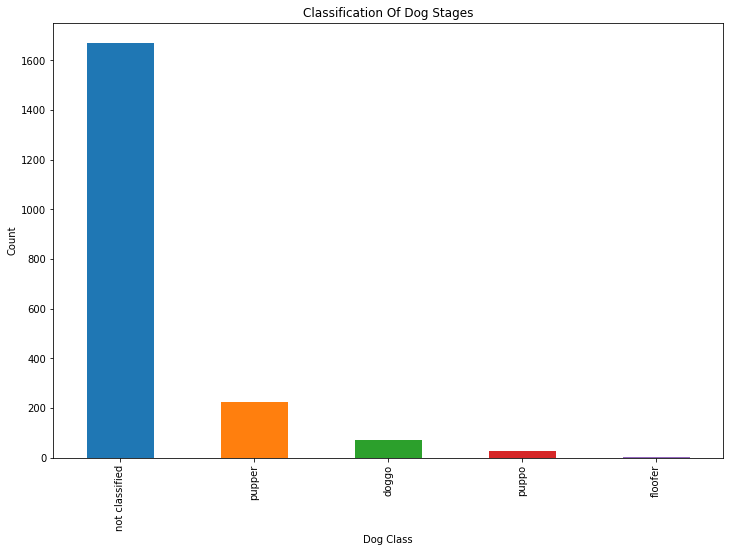

In [63]:
# visualizing dog class
ax = df['dog_class'].value_counts().plot(kind='bar', title='Classification Of Dog Stages',figsize=(12,8));
ax.set_xlabel('Dog Class')
ax.set_ylabel('Count')

The above graph shows the value counts of classification of dog stages in the data set. It can be seen that majority of the Dogs are not classified, of the classified dogs the Pupper is the most popular followed by Doggo then Puppo. Dogs at the Floofer stages are the least popular dogs

In [68]:
dog_class = df['dog_class'].value_counts()

In [69]:
print(dog_class)

not classified    1668
pupper             223
doggo               72
puppo               28
floofer              3
Name: dog_class, dtype: int64


### Insights:
1. Majority of the dogs are not classified

2. According to the bar graph, Pupper is the most popular of the Classified dogs.

3. The number of dogs in the floofer stage is significantly low.